In [2]:
"""
Created on Wed Sep 21 19:14:12 2022
@author: Dr Ambi,
"""

from sklearn.datasets import fetch_openml
import pickle
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


In [3]:
#Sklearn Feature selection
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
#https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection

#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold


In [4]:
digitsDataFirst100=pickle.load(open( "digitsDataFirst100.p", "rb" ) )
targetFirst100=pickle.load(open( "targetFirst100.p", "rb" ) )

In [5]:
digitsData=digitsDataFirst100
target=targetFirst100
digitsData.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
desc=digitsData.describe()
print(desc)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
count   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   100.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
count    100.0  ...     100.0     100.0     100.0     100.0     100.0   
mean       0.0  ...       0.0       0.0       0.0       0.0       0.0   
std        0.0  ...       0.0       0.0       0.0  

(100, 784)
(784,)


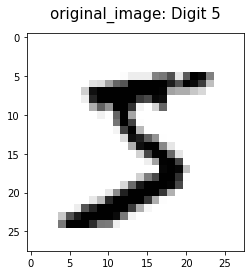

In [7]:
desc=digitsData.describe()

print(digitsData.shape)

import matplotlib.pyplot as plt



#Plot first image
i=0
print(digitsData.iloc[i].values.shape)
original_image = digitsData.iloc[i].values.reshape([28,28])
plt.imshow(original_image, cmap='gray_r')
plt.title("original_image: Digit " + target[i], fontsize=15, pad=15)
plt.savefig("original_image image.png")


In [8]:

#No scaling required as all values in same scale
print(digitsData.iloc[1].min())
print(digitsData.iloc[1].max())


0.0
255.0


Text(0, 0.5, 'variance')

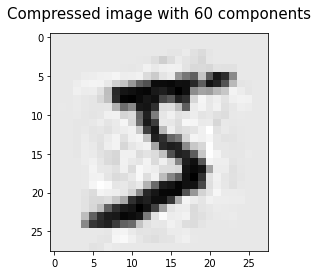

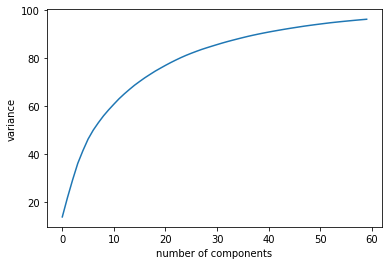

In [18]:
numComponents=60
pca = PCA(n_components=numComponents)
mnist_new_features = pca.fit_transform(digitsData)

#print(mnist_new_features.shape)
#print(mnist_new_features)
#print(type(mnist_new_features))
mnist_reduced_recovered_image = pca.inverse_transform(mnist_new_features)

image_reduced = mnist_reduced_recovered_image[i,:].reshape([28,28])
plt.figure(0)
plt.imshow(image_reduced, cmap='gray_r')
plt.title('Compressed image with ' + str(numComponents) +' components', fontsize=15, pad=15)
#plt.savefig("images/reduced_image_with_" + str(numComponents) + "_pca_components.png")
plt.savefig("reduced_image_with_" + str(numComponents) + "_pca_components.png")
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
cumulativevariance=np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(1)
plt.plot(cumulativevariance)
plt.xlabel('number of components')
plt.ylabel('variance')


In [10]:
df1=pd.DataFrame(mnist_new_features)
df1.head()

desc=df1.describe()
print(desc)










                 0             1             2             3             4   \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean   7.617018e-14 -1.250555e-14 -1.324452e-13 -3.154810e-14  7.787548e-14   
std    6.660491e+02  5.116718e+02  4.924304e+02  4.739857e+02  4.167841e+02   
min   -9.088630e+02 -1.044248e+03 -9.125426e+02 -8.738673e+02 -8.436267e+02   
25%   -5.636989e+02 -3.193785e+02 -3.585628e+02 -3.246417e+02 -3.024862e+02   
50%   -1.350736e+02 -3.977772e+01 -5.245325e+01 -5.258952e+01 -2.122688e-01   
75%    3.193674e+02  3.453945e+02  3.138463e+02  3.309972e+02  2.572756e+02   
max    1.643322e+03  1.335523e+03  1.135010e+03  1.198639e+03  8.805235e+02   

                 5             6             7             8             9   \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean  -6.561862e-14 -1.477929e-14  4.177991e-14  9.094947e-15  1.790568e-14   
std    3.960680e+02  3.495432e+02  3.189113e+02  3.

Text(0, 0.5, 'variance')

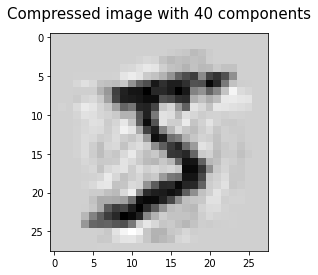

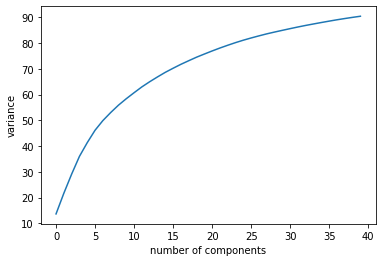

In [20]:
numComponents=40
pca = PCA(n_components=numComponents)
mnist_new_features = pca.fit_transform(digitsData)

#print(mnist_new_features.shape)
#print(mnist_new_features)
#print(type(mnist_new_features))
mnist_reduced_recovered_image = pca.inverse_transform(mnist_new_features)

image_reduced = mnist_reduced_recovered_image[i,:].reshape([28,28])
plt.figure(0)
plt.imshow(image_reduced, cmap='gray_r')
plt.title('Compressed image with ' + str(numComponents) +' components', fontsize=15, pad=15)
#plt.savefig("images/reduced_image_with_" + str(numComponents) + "_pca_components.png")
plt.savefig("reduced_image_with_" + str(numComponents) + "_pca_components.png")
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
cumulativevariance=np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(1)
plt.plot(cumulativevariance)
plt.xlabel('number of components')
plt.ylabel('variance')


Text(0, 0.5, 'variance')

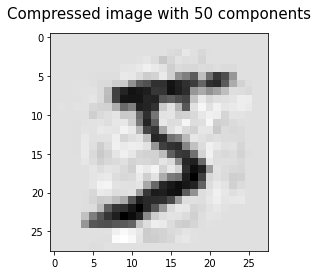

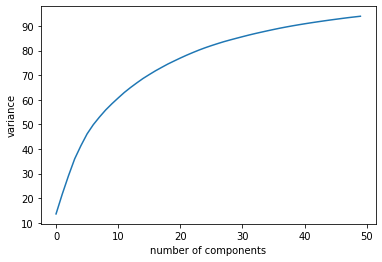

In [21]:
numComponents=50
pca = PCA(n_components=numComponents)
mnist_new_features = pca.fit_transform(digitsData)

#print(mnist_new_features.shape)
#print(mnist_new_features)
#print(type(mnist_new_features))
mnist_reduced_recovered_image = pca.inverse_transform(mnist_new_features)

image_reduced = mnist_reduced_recovered_image[i,:].reshape([28,28])
plt.figure(0)
plt.imshow(image_reduced, cmap='gray_r')
plt.title('Compressed image with ' + str(numComponents) +' components', fontsize=15, pad=15)
#plt.savefig("images/reduced_image_with_" + str(numComponents) + "_pca_components.png")
plt.savefig("reduced_image_with_" + str(numComponents) + "_pca_components.png")
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
cumulativevariance=np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(1)
plt.plot(cumulativevariance)
plt.xlabel('number of components')
plt.ylabel('variance')


Text(0, 0.5, 'variance')

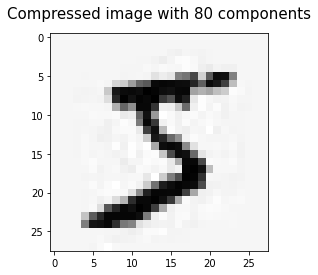

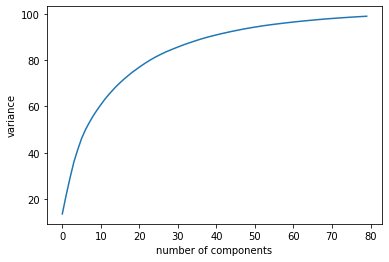

In [22]:
numComponents=80
pca = PCA(n_components=numComponents)
mnist_new_features = pca.fit_transform(digitsData)

#print(mnist_new_features.shape)
#print(mnist_new_features)
#print(type(mnist_new_features))
mnist_reduced_recovered_image = pca.inverse_transform(mnist_new_features)

image_reduced = mnist_reduced_recovered_image[i,:].reshape([28,28])
plt.figure(0)
plt.imshow(image_reduced, cmap='gray_r')
plt.title('Compressed image with ' + str(numComponents) +' components', fontsize=15, pad=15)
#plt.savefig("images/reduced_image_with_" + str(numComponents) + "_pca_components.png")
plt.savefig("reduced_image_with_" + str(numComponents) + "_pca_components.png")
np.cumsum(pca.explained_variance_ratio_ * 100)[-1]
cumulativevariance=np.cumsum(pca.explained_variance_ratio_*100)
plt.figure(1)
plt.plot(cumulativevariance)
plt.xlabel('number of components')
plt.ylabel('variance')
